# Credit Card Fraud Project

## Goal of this Project

- Practice building different machine learning models to detect fraud
- Understand how to evaluate different models and improve models

## Data Source

The data can be found on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Due to privacy issue, PAC was conducted on the dataset so we don't have the original features. The only original features we have are: **time**, **amount** and **flag**
that can indicate fraud or not.

## Explore the data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
# import data

raw_data = pd.read_csv('creditcard.csv')

In [3]:
# a glance at the data

raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# info about data

raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# check if any value is missing

raw_data.isna().sum().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


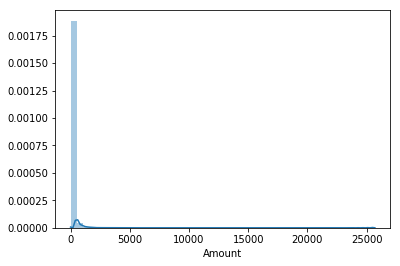

In [6]:
# distribution of amount

sns.distplot(raw_data['Amount'], bins = 50)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


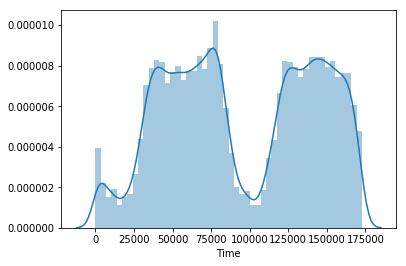

In [7]:
# distribution of time

sns.distplot(raw_data['Time'])

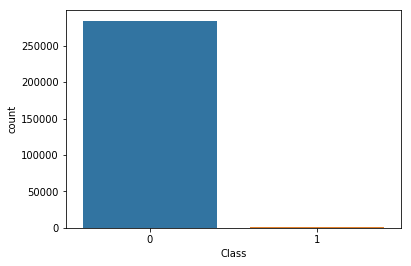

In [8]:
# Target Variable

sns.countplot(raw_data['Class'])

In [9]:
raw_data.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

Based on the information above, we learned:

1. There is no missing value in the data so we don't have to impute missing value.
2. **The feature amount doesn't follow normal distribution**. Since feature standardization is usually performed before PCA, we need to **transform these two features**.
3. Since the time represents seconds elapsed between each transaction and the first transaction in the dataset instead of actual time when transaction happened, we will drop this feature.
4. From the barchart we can see that we have an **imbalanced dataset**. Only 0.17% of the examples are fraud. We need resample to make sure we have a good model. Otherwise, the model will just predict non-fraud for every examples.

## Feature transformation

In [10]:
# import libraries

from sklearn.preprocessing import StandardScaler

In [11]:
# Transform 'amount' and drop 'time'

raw_data['transAmount'] = StandardScaler().fit_transform(raw_data['Amount'].values.reshape(-1,1))
data = raw_data.drop(['Time','Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,transAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Resampling

The goal of resampling the data is to let us have a balanced dataset so we we have build accurate models. Specifically, I prepare to **undersample** the dataset so I wll have a balanced dataset.

In [12]:
# separate dataset to fraud and non-fraud

fraud_data = data[data['Class']==1]

non_fraud_data = data[data['Class']==0]

# randomly sample non-fraud dataset

fraud_size = len(fraud_data)

non_fraud_sample = non_fraud_data.sample(n = fraud_size, random_state = 101)

# combine two datasets

model_data = pd.concat([fraud_data, non_fraud_sample])

X = model_data.drop('Class', axis = 1)
y = model_data['Class']

## Build Models

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33)

### Building Logistic Regression Model

I start with logistic regression because it's widely used and easy to understand. I will try different models later.

In [15]:
# library for building model, finding the best parameter and evaluating models

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, make_scorer

Usually we use accuracy, precision and recall to evaluate a classification model. In this case, it won't hurt if we predict a transaction as fraud when it's not. But it will hurt vice versa. So we want to capture as many fraud transations as we cam. Therefore, when evaluating different parameters and different models, I will focus on **recall score**.

In [16]:
# Build grid

recall_score = make_scorer(recall_score)

logit_search = GridSearchCV(LogisticRegression(), param_grid={'C':[0.1,0.3,1,3,10,30]}, scoring=recall_score)

In [17]:
# Find the best model based on recall

logit_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.3, 1, 3, 10, 30]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(recall_score), verbose=0)

In [18]:
logit_search.best_params_

{'C': 3}

In [19]:
logit_predictions = logit_search.predict(X_test)

In [20]:
print(classification_report(y_test, logit_predictions))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       144
          1       0.95      0.93      0.94       152

avg / total       0.94      0.94      0.94       296



We have precision score of **0.95** and recall score of **0.93** for fraud class, which is not bad. But it's far away from production since we only captured 93% of fraud transactions. Next, I will build different models including decision tree, random forest and SVM. Then, I will try a different sampling method. After that, I will diagonose these models and improve them.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
# Decision Tree

dtree = DecisionTreeClassifier()

dtree_param = {"criterion": ["gini", "entropy"],
               "max_depth": [3, None],
              "max_features": sp.stats.randint(1, 14),
              "min_samples_split": sp.stats.randint(2, 14),
              }

n_iter_search = 20

dtree_search = RandomizedSearchCV(dtree, param_distributions=dtree_param, n_iter= n_iter_search, scoring=recall_score)

In [23]:
dtree_search.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002060555EC88>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002060555EE48>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=make_scorer(recall_score),
          verbose=0)

In [24]:
dtree_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 13,
 'min_samples_split': 12}

In [25]:
dtree_predictions = dtree_search.predict(X_test)

In [26]:
print(classification_report(y_test, dtree_predictions))

             precision    recall  f1-score   support

          0       0.89      0.94      0.92       144
          1       0.94      0.89      0.92       152

avg / total       0.92      0.92      0.92       296



In [27]:
# random forest

rdforest = RandomForestClassifier()

rdforest_param = {"n_estimators" : sp.stats.randint(80,120),
                "criterion": ["gini", "entropy"],
               "max_depth": [3, None],
              "max_features": sp.stats.randint(1, 14),
              "min_samples_split": sp.stats.randint(2, 14),
              "bootstrap": [True, False]
              }

rdforest_search = RandomizedSearchCV(rdforest, param_distributions=rdforest_param, n_iter = n_iter_search, scoring=recall_score)

In [28]:
rdforest_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002060556B470>, 'criterion': ['gini', 'entropy'], 'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002060555EC18>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002060556B438>, 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None

In [29]:
rdforest_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_split': 13,
 'n_estimators': 112}

In [30]:
rdforest_predictions = rdforest_search.predict(X_test)

In [31]:
print(classification_report(y_test, rdforest_predictions))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       144
          1       0.97      0.91      0.94       152

avg / total       0.94      0.94      0.94       296



In [32]:
# SVM

svm = SVC()

svm_params = {
    "C":[0.1,0.3,1,3,10,30],
    "kernel": ['linear','poly','rbf']
}

svm_search = GridSearchCV(svm,param_grid = svm_params,scoring=recall_score)

In [33]:
svm_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.3, 1, 3, 10, 30], 'kernel': ['linear', 'poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(recall_score), verbose=0)

In [34]:
svm_search.best_params_

{'C': 30, 'kernel': 'rbf'}

In [35]:
svm_predictions = svm_search.predict(X_test)

In [36]:
print(classification_report(y_test, svm_predictions))

             precision    recall  f1-score   support

          0       0.93      0.92      0.92       144
          1       0.92      0.93      0.93       152

avg / total       0.93      0.93      0.93       296

